In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low= -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-75.69471251930038, -17.398684987350066),
 (42.65237469658845, -80.64282996037028),
 (-68.40761370451042, -140.4242134872066),
 (-83.69919199494522, -51.30693241824096),
 (-80.67424407856136, 39.78393819595868),
 (50.325075646072946, -121.30164174179598),
 (2.1121251498160802, -2.3350690079116134),
 (44.1378562285324, 59.31624906558554),
 (36.832800467550285, -89.60653244931497),
 (-73.92335946321033, 11.054350891016611),
 (2.3690037523560648, 94.58339004012771),
 (-54.77000878992015, 179.4623043744308),
 (-40.52623187571847, -24.09933848860291),
 (-14.280545105460192, 56.92921688479075),
 (31.969440589953024, -0.6250778358083835),
 (58.67453847470591, 62.797600833996654),
 (-30.75623559358415, -78.45849111118748),
 (-43.52601439936064, 20.571868617087205),
 (-80.02843017956253, -3.337419108570515),
 (40.39446494226624, -92.3609627846143),
 (21.066084426369557, -119.49640083824178),
 (2.80200073808345, 51.75554695307517),
 (-42.814260996368844, 63.51616901767241),
 (64.46355718829267

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
#cities = cities[0:10]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tilsonburg
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | ashcroft
Processing Record 6 of Set 1 | axim
Processing Record 7 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 8 of Set 1 | sikeston
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | cap malheureux
Processing Record 14 of Set 1 | aflu
City not found. Skipping...
Processing Record 15 of Set 1 | gari
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | kirksville
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | hobyo
Processing Record 21 of Set 1 | sain

Processing Record 37 of Set 4 | dikson
Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | beitbridge
Processing Record 41 of Set 4 | zhuhai
Processing Record 42 of Set 4 | pimenta bueno
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | kharan
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | gornorechenskiy
Processing Record 49 of Set 4 | cherepovets
Processing Record 50 of Set 4 | lavrentiya
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | palembang
Processing Record 3 of Set 5 | tacuarembo
Processing Record 4 of Set 5 | eureka
Processing Record 5 of Set 5 | belaya gora
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | walvis bay
Processing Record 8 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 5 | airai
Processing Record 10

Processing Record 30 of Set 8 | port-gentil
Processing Record 31 of Set 8 | yinchuan
Processing Record 32 of Set 8 | palm city
Processing Record 33 of Set 8 | marsh harbour
Processing Record 34 of Set 8 | ambulu
Processing Record 35 of Set 8 | taungdwingyi
Processing Record 36 of Set 8 | wicklow
Processing Record 37 of Set 8 | ashqelon
Processing Record 38 of Set 8 | ariquemes
Processing Record 39 of Set 8 | mankera
Processing Record 40 of Set 8 | codajas
Processing Record 41 of Set 8 | am timan
Processing Record 42 of Set 8 | dauphin
Processing Record 43 of Set 8 | toyooka
Processing Record 44 of Set 8 | cordoba
Processing Record 45 of Set 8 | bathsheba
Processing Record 46 of Set 8 | birpur
Processing Record 47 of Set 8 | quelimane
Processing Record 48 of Set 8 | santa rosa
Processing Record 49 of Set 8 | puro
Processing Record 50 of Set 8 | agadir
Processing Record 1 of Set 9 | dolny kubin
Processing Record 2 of Set 9 | bouna
Processing Record 3 of Set 9 | bend
Processing Record 4 o

Processing Record 22 of Set 12 | kosonsoy
Processing Record 23 of Set 12 | tazovskiy
Processing Record 24 of Set 12 | iracoubo
Processing Record 25 of Set 12 | wahiawa
Processing Record 26 of Set 12 | kerouane
Processing Record 27 of Set 12 | mitsamiouli
Processing Record 28 of Set 12 | parole
Processing Record 29 of Set 12 | zeya
Processing Record 30 of Set 12 | imbituba
Processing Record 31 of Set 12 | quetta
Processing Record 32 of Set 12 | acapulco
Processing Record 33 of Set 12 | tawkar
City not found. Skipping...
Processing Record 34 of Set 12 | ust-kuyga
Processing Record 35 of Set 12 | tukrah
Processing Record 36 of Set 12 | richards bay
Processing Record 37 of Set 12 | chibuto
Processing Record 38 of Set 12 | westport
Processing Record 39 of Set 12 | menongue
Processing Record 40 of Set 12 | glamoc
Processing Record 41 of Set 12 | bahia de caraquez
Processing Record 42 of Set 12 | husavik
Processing Record 43 of Set 12 | tamandare
Processing Record 44 of Set 12 | sturgeon fall

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,55.02,81,100,9.22,AR,2022-03-26 16:45:53
1,Rikitea,-23.1203,-134.9692,78.98,74,4,13.47,PF,2022-03-26 16:45:23
2,Port Alfred,-33.5906,26.8910,66.18,83,100,4.00,ZA,2022-03-26 16:45:54
3,Ashcroft,50.7165,-121.2859,43.48,83,99,5.46,CA,2022-03-26 16:45:54
4,Axim,4.8699,-2.2405,84.27,71,71,10.25,GH,2022-03-26 16:45:54


In [14]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Windspeed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-03-26 16:45:53,-54.8000,-68.3000,55.02,81,100,9.22
1,Rikitea,PF,2022-03-26 16:45:23,-23.1203,-134.9692,78.98,74,4,13.47
2,Port Alfred,ZA,2022-03-26 16:45:54,-33.5906,26.8910,66.18,83,100,4.00
3,Ashcroft,CA,2022-03-26 16:45:54,50.7165,-121.2859,43.48,83,99,5.46
4,Axim,GH,2022-03-26 16:45:54,4.8699,-2.2405,84.27,71,71,10.25


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

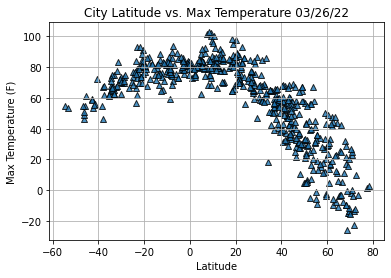

In [18]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor ="black", linewidth = 1, marker ="^",alpha =0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


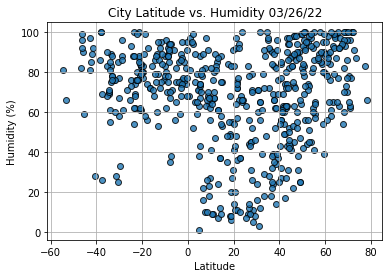

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

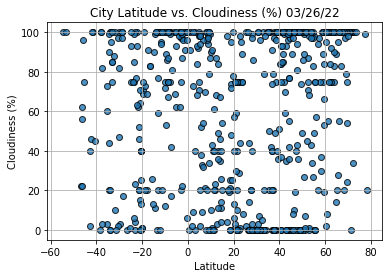

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

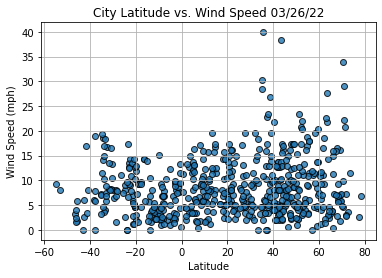

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()